In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold

In [2]:
def compare_models_num_seed(g, iter = 1000, num_seeds = 10):
  IC = Independent_Cascade()
  IC.fit(g)
  DC = Decreasing_Cascade()
  DC.fit(g)
  WC = Weighted_Cascade()
  WC.fit(g)
  TR = Trivalency_Model()
  TR.fit(g)
  LT = linear_threshold()
  LT.fit(g)
  GT = general_threshold()
  GT.fit(g)
  models = [IC, DC, WC, TR, LT, GT]
  times = np.zeros(6)
  steps = [[],[],[],[],[],[]]
  num_nodes = [[],[],[],[],[],[]]
  for _ in range(iter):
    seeds = rd.sample(list(g.nodes()), num_seeds)
    for i in range(len(models)):
      start_time = time.time()
      _, activate_nums = models[i].diffusion_all(seeds)
      end_time = time.time()
      num_nodes[i].append(sum(activate_nums))
      steps[i].append(len(activate_nums))
      times[i] += end_time - start_time
  return times/iter, np.mean(steps, axis=1), np.mean(num_nodes, axis=1)

In [3]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [4]:
def compare_models(g, iter = 1000, max_num_seeds = 10):
    times_list = []
    steps_list = []
    num_nodes_list = []
    for i in range(1, max_num_seeds+1):
        times, steps, num_nodes = compare_models_num_seed(G, iter, i)
        times_list.append(times)
        steps_list.append(steps)
        num_nodes_list.append(num_nodes)
    return np.array(times_list), np.array(steps_list), np.array(num_nodes_list)

In [5]:
times, steps, num_nodes = compare_models(G, 100, 40)

In [6]:
print(times)
print(steps)
print(num_nodes)


[[2.23402023e-03 2.84233570e-03 2.48908997e-04 5.95307350e-05
  3.15260601e-02 4.76877689e-03]
 [6.13319635e-03 6.81252003e-03 1.49364471e-04 2.29094028e-04
  1.09311709e-01 4.33423758e-03]
 [5.78513384e-03 5.36713600e-03 2.80635357e-04 4.49326038e-04
  1.69277973e-01 7.15305090e-03]
 [1.08015466e-02 7.69923449e-03 3.68752480e-04 4.58064079e-04
  2.22658257e-01 1.09916091e-02]
 [1.00944781e-02 9.10541296e-03 4.48231697e-04 6.07340336e-04
  2.38432240e-01 1.51103497e-02]
 [1.30234575e-02 9.47328091e-03 6.07874393e-04 7.37745762e-04
  3.51942976e-01 2.08530474e-02]
 [1.12872934e-02 1.11403227e-02 7.79097080e-04 6.68666363e-04
  3.26406870e-01 2.71981549e-02]
 [1.91630816e-02 1.50390649e-02 9.14597511e-04 1.00661993e-03
  4.00758815e-01 3.64821172e-02]
 [1.73628545e-02 1.61595106e-02 7.37478733e-04 1.19740009e-03
  4.02649500e-01 4.00126338e-02]
 [1.65738869e-02 2.23833680e-02 8.46531391e-04 1.12623692e-03
  4.85928965e-01 4.77641344e-02]
 [1.90185165e-02 2.19411421e-02 1.28604174e-03 1.2

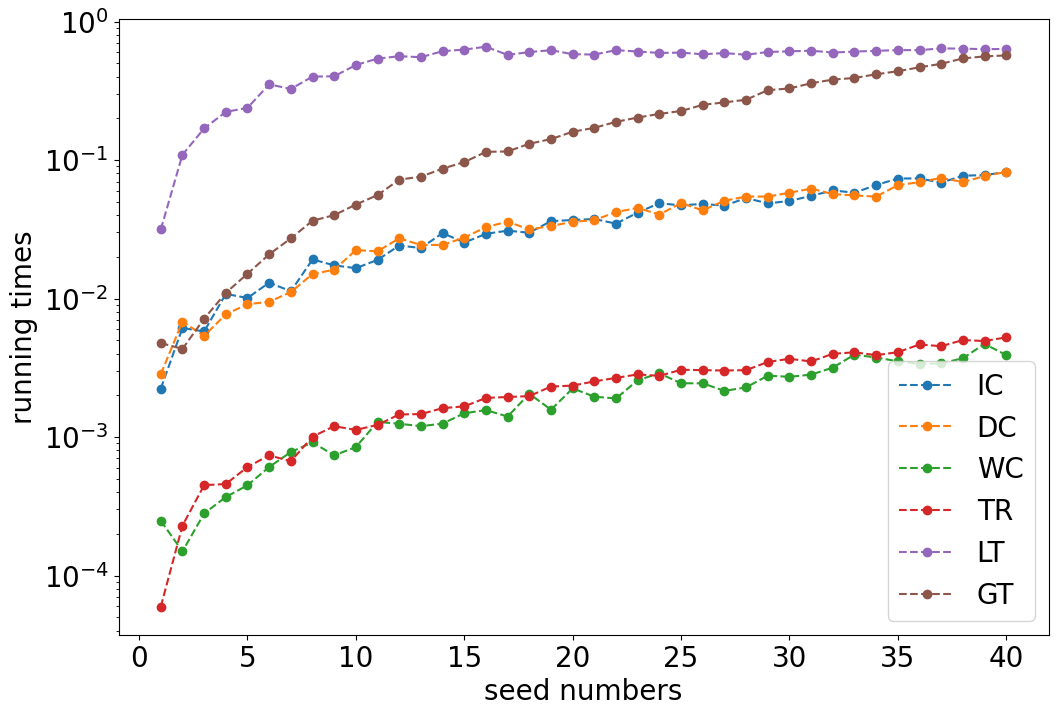

In [7]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,5], 'o--', label='GT')

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)

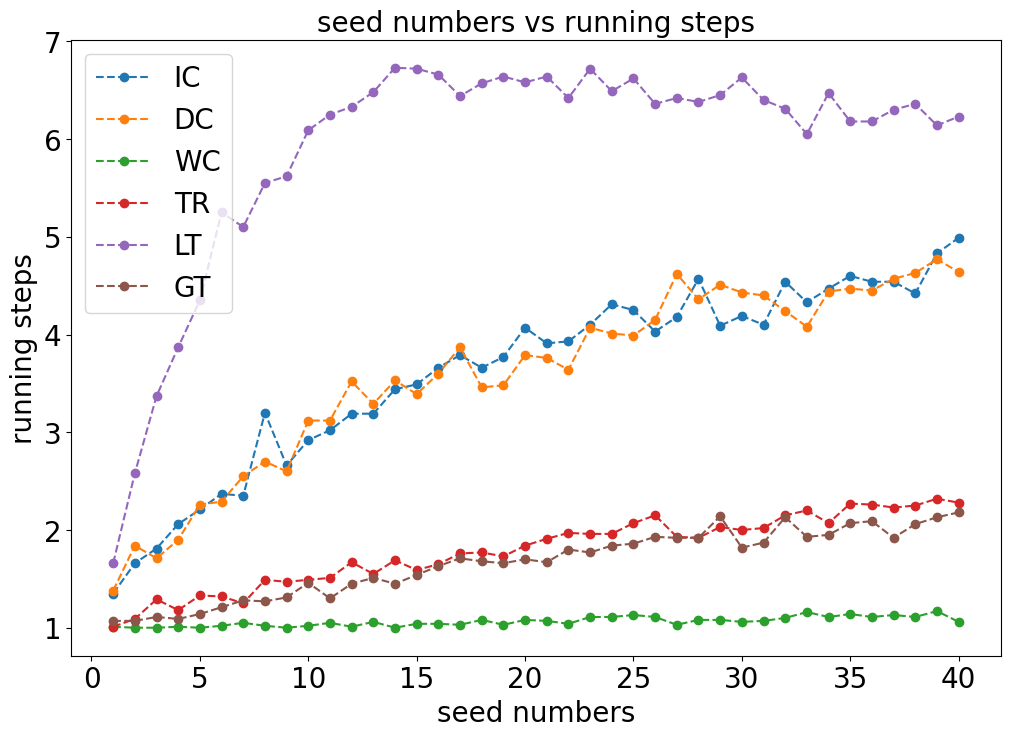

In [13]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running steps', fontsize=20)
plt.title('seed numbers vs running steps', fontsize=20)
plt.legend(fontsize=20)

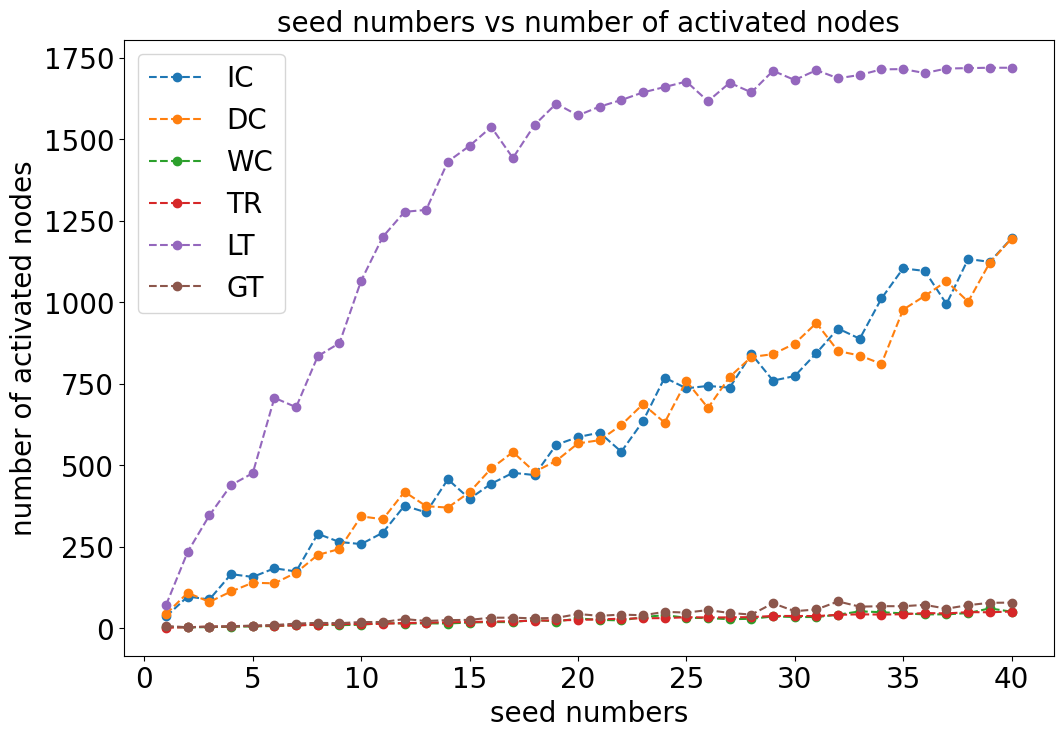

In [15]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('number of activated nodes', fontsize=20)
plt.title('seed numbers vs number of activated nodes', fontsize=20)
plt.legend(fontsize=20)

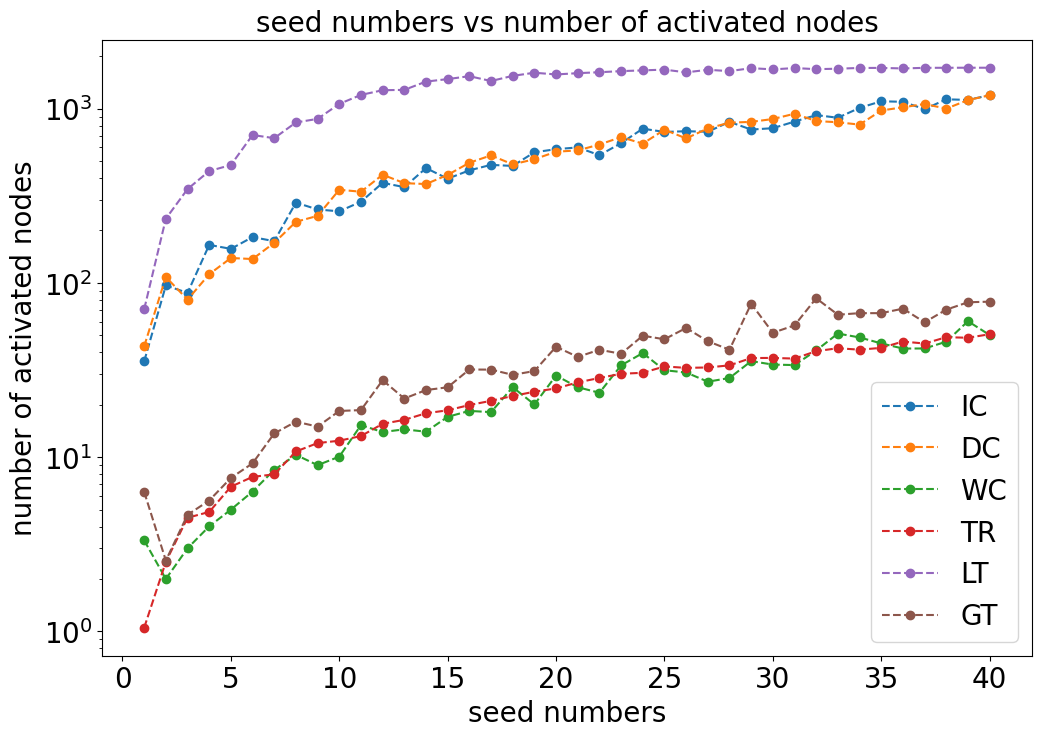

In [11]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('number of activated nodes', fontsize=20)
plt.title('seed numbers vs number of activated nodes', fontsize=20)
plt.legend(fontsize=20)